# Qubit
Estado en superposición, en contraste con el bit clásico.

Para emplear la comutación cuántica se usa qiskit en Python.

In [95]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
import numpy as np

## Ket

Vectores columna:

In [96]:
ket0 = [[1],[0]]
array_to_latex(ket0)

<IPython.core.display.Latex object>

In [97]:
ket1 = [[0],[1]]
array_to_latex(ket1)

<IPython.core.display.Latex object>

Se usa array_to_latex() SOLO para escribir y visualizar los qubits.

In [98]:
ket_plus  = [[1/np.sqrt(2)],[1/np.sqrt(2)]]
array_to_latex(ket_plus)

<IPython.core.display.Latex object>

Se usa Statevector para convertirlo en un objeto que se puede manipular en Python:

In [99]:
ket_0 = Statevector(ket0)
ket_0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [100]:
ket_0.draw('latex')

<IPython.core.display.Latex object>

In [101]:
ket_1 = Statevector(ket1)
ket_1.draw('latex')

<IPython.core.display.Latex object>

In [156]:
ket_plus = Statevector(ket_plus)
ket_plus.draw('latex')

<IPython.core.display.Latex object>

Se puede verificar la normalziación de un vector con el método is_valid()

In [103]:
ket_plus.is_valid()

True

Se puede ver la probabilidad de cada base con probabilities()

In [104]:
print(ket_0.probabilities())

[1. 0.]


In [105]:
print(ket_plus.probabilities())

[0.5 0.5]


Para emplear bases conocidas, usamos Statevector.from_label()

In [106]:
ket_plus = Statevector.from_label('+')
ket_plus.draw('latex')

<IPython.core.display.Latex object>

In [107]:
ket_minus = Statevector.from_label('-')
ket_minus.draw('latex')

<IPython.core.display.Latex object>

In [108]:
ket_r = Statevector.from_label('r')
ket_r.draw('latex')

<IPython.core.display.Latex object>

## Bra
Se representan por vectores fila y son los transpuestos conjugados de los kets

In [109]:
bra0 = [1, 0]
array_to_latex(bra0)

<IPython.core.display.Latex object>

In [110]:
bra1 = [0, 1]
array_to_latex(bra1)

<IPython.core.display.Latex object>

# Producto interno

In [111]:
from qiskit.quantum_info.operators import Operator

Se usa Operator() para crear un operador que permita multiplicar por ese vector

In [112]:
Operator_ket0 = Operator(ket0)
Operator_ket0

Operator([[1.+0.j],
          [0.+0.j]],
         input_dims=(), output_dims=(2,))

In [113]:
array_to_latex(Operator_ket0)

<IPython.core.display.Latex object>

In [114]:
Operator_bra1 = Operator(bra1)
Operator_bra1

Operator([0.+0.j, 1.+0.j],
         input_dims=(), output_dims=(2,))

In [115]:
array_to_latex(Operator_bra1)

<IPython.core.display.Latex object>

El producto interno sigue el orden bra-ket\
Esto es:
$$\braket{1|0}$$
y para multiplicarlos en qiskit, se debe respetar ese orden.

In [116]:
Dot_10 = np.dot(Operator_bra1, Operator_ket0)
Dot_10

array([0.+0.j])

In [117]:
array_to_latex(Dot_10)

<IPython.core.display.Latex object>

Añadiendo los operadores de las bases faltantes

In [118]:
Operator_ket1 = Operator(ket1)
Operator_bra0 = Operator(bra0)

In [119]:
array_to_latex(Operator_ket1)

<IPython.core.display.Latex object>

# Producto externo
Se usan los mismos operadores creados previamente

In [120]:
Producto_externo_00 = np.outer(Operator_ket0, Operator_bra0)
Producto_externo_00

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [121]:
array_to_latex(Producto_externo_00)

<IPython.core.display.Latex object>

## Matriz unitaria

In [130]:
Operator_ket1 = Operator(ket1)
Operator_bra0 = Operator(bra0)

In [131]:
Producto_externo_00 = np.outer(Operator_bra0, Operator_ket0)
Producto_externo_11 = np.outer(Operator_bra1, Operator_ket1)

In [132]:
identity = Producto_externo_00 + Producto_externo_11
array_to_latex(identity)

<IPython.core.display.Latex object>

# Esfera de Bloch
Es una representación 3D del estado cuántico de un qubit

In [133]:
from qiskit.visualization import plot_bloch_vector

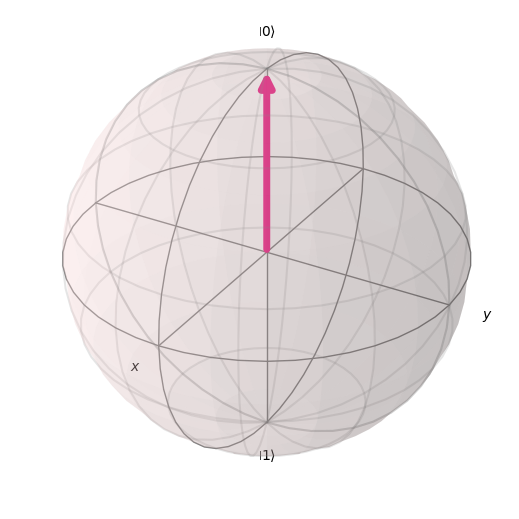

In [134]:
plot_bloch_vector([0,0,1]) #Estado |0> en coordenadas (x,y,z)

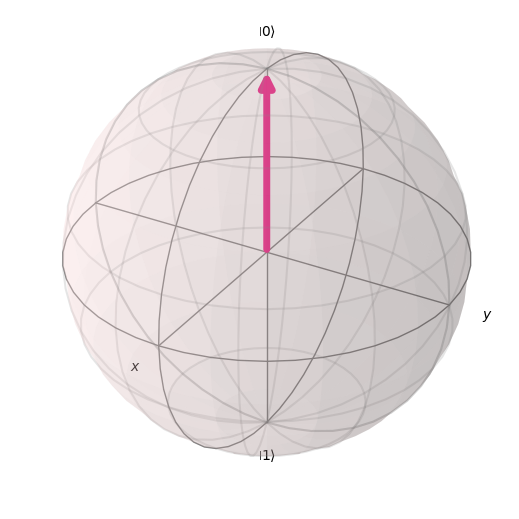

In [135]:
plot_bloch_vector([1,0,0], coord_type='spherical') #Estado |0> en esféricas (r,theta,phi)

Para un estado arbitrario usamos plot_bloch_multivector

In [136]:
from qiskit.visualization import plot_bloch_multivector

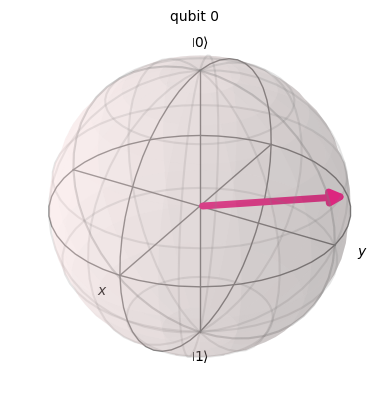

In [137]:
ket = Statevector([[(1+2j)/3],[-2/3]])
plot_bloch_multivector(ket)

# Qubits entrelazados

In [138]:
qubit = Statevector([np.sqrt(2),1,0,1j])
qubit.draw('latex')

<IPython.core.display.Latex object>

In [139]:
q1 = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])
q2 = Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])
q2.draw('latex')

<IPython.core.display.Latex object>

In [140]:
q = q1.tensor(q2)
q.draw('latex')

<IPython.core.display.Latex object>

In [141]:
q = q2.tensor(q1)
q.draw('latex')

<IPython.core.display.Latex object>

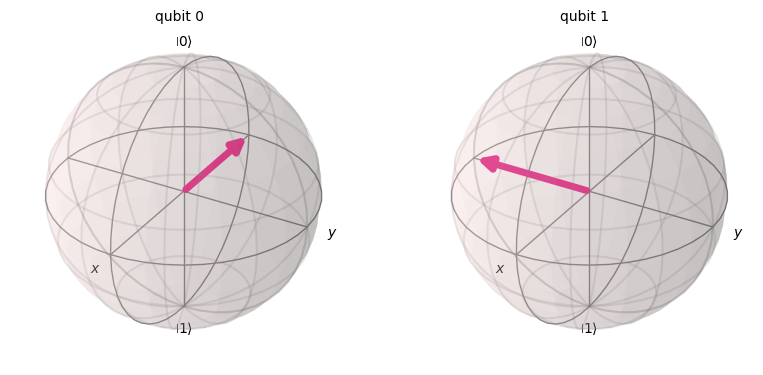

In [142]:
plot_bloch_multivector(q)

In [143]:
q.is_valid()

True

La probabilidad de las bases entrelazadas se puede calcular con el método .probalitie() o con el método .probabilities_dict()

In [144]:
prob_q = q.probabilities()
prob_q

array([0.25, 0.25, 0.25, 0.25])

In [145]:
prob_for_qubit = q.probabilities_dict()
prob_for_qubit

{'00': 0.2499999999999999,
 '01': 0.2499999999999999,
 '10': 0.2499999999999999,
 '11': 0.2499999999999999}

La probabilidad por cada qubit se calcula con el método .probabilities_dict([i]) donde $i$ es el qubit i-ésimo contando de derecha hasta izquierda empezando en $i=0$

In [146]:
prob_for_qubit2 = q.probabilities_dict([0])
prob_for_qubit2

{'0': 0.4999999999999998, '1': 0.4999999999999998}

# Operadores unitarios

In [152]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import array_to_latex

In [153]:
Operator_1 = Operator([[1,1],[1,0]])
Operator_1

Operator([[1.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [154]:
array_to_latex(Operator_1)

<IPython.core.display.Latex object>

## Matrices de Pauli

# Compuertas cuánticas

Análogas a sus compuertas lógicas, pero estas tienen el mismo número de entradas y de salidas por lo que son reversibles

# Tipos de compuertas

## Compuertas unarias
Tiene un qubit de entrada y uno de salida y representan giros sobre la esfera de Bloch

### Compuerta X o compuerta NOT
Esta compuerta cambia la base computacional
$$X\ket{0}=\ket{1}$$
$$X\ket{1}=\ket{0}$$

Sobre un qubit general, $NOT$ invierte las bases

### Compuerta Y

### Compuerta Z

### Compuerta Hadamard
Superpone las bases formando los estados $+$ y $-$ a partir de las entradas $\ket{0}$ y $\ket{1}$, respectivamente
$$\hat{H}\ket{0}=\ket{+}$$
$$\hat{H}\ket{1}=\ket{-}$$